Based on the provided analysis and visualizations from the dataset, here are three main observations:

Observation 1: 
Drug Regimen Effectiveness
The summary statistics for each drug regimen indicate variability in the mean and median tumor volumes. Notably, Capomulin and Ramicane show lower mean and median tumor volumes compared to other regimens like Infubinol and Ceftamin. This suggests that Capomulin and Ramicane may be more effective in reducing tumor volume.

Bar Charts: Both bar charts generated using Pandas and Matplotlib show the total number of rows (Mouse ID/Timepoints) for each drug regimen. Capomulin and Ramicane have a substantial number of observations, indicating robust data for these treatments.

Observation 2: 
Gender Distribution
Pie Charts: The distribution of female versus male mice in the study is nearly equal, with a slight predominance of male mice. Both pie charts generated using Pandas and Matplotlib confirm this balanced gender distribution. This balance is essential to ensure that the results are not biased due to gender differences.

Observation 3: 
Tumor Volume and Mouse Weight Correlation
Scatter Plot and Linear Regression: The scatter plot of mouse weight versus average observed tumor volume for the Capomulin treatment regimen, along with the linear regression line, reveals a positive correlation between these two variables. The correlation coefficient calculated is positive, indicating that as the weight of the mouse increases, the average tumor volume also tends to increase. This relationship is statistically significant, as shown by the linear regression model plotted on the scatter plot.

Additional Notes:
Outliers: The analysis of quartiles and IQR for the most promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) identifies potential outliers. These outliers are critical as they might indicate unusual responses to treatment or data errors.
Line Plot for Individual Mouse: The line plot for a single mouse treated with Capomulin shows how tumor volume changes over time. This time-series data is valuable for understanding the treatment's progression and effectiveness on an individual level.

These observations provide insights into the effectiveness of different drug regimens, the importance of balanced gender distribution, and the relationship between mouse weight and tumor volume, aiding in the interpretation and further analysis of the study's findings.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# 1. Prepare the Data: Merge the data
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")



In [2]:
# 2. Display the number of unique mice IDs
unique_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {unique_mice}")


Number of unique mice IDs: 249


In [3]:

# Check for any mouse ID with duplicate time points
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate mice with time points:")
print(duplicate_mice)

# 3. Display the data associated with that mouse ID
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()[0]
print(f"Data for mouse ID {duplicate_mouse_id}:")
print(combined_data[combined_data["Mouse ID"] == duplicate_mouse_id])

Duplicate mice with time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0 

In [4]:

# Create a new DataFrame where this data is removed
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# 4. Use this cleaned DataFrame for the remaining steps
# Display the updated number of unique mice IDs
unique_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"Updated number of unique mice IDs: {unique_mice_cleaned}")

# a. Generate Summary Statistics
summary_stats = cleaned_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Tumor_Volume_Variance=("Tumor Volume (mm3)", "var"),
    Tumor_Volume_StdDev=("Tumor Volume (mm3)", "std"),
    Tumor_Volume_SEM=("Tumor Volume (mm3)", "sem")
    
)

# b. Create a DataFrame of summary statistics
print("Summary Statistics:")
print(summary_stats)

Updated number of unique mice IDs: 249
Summary Statistics:
              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533

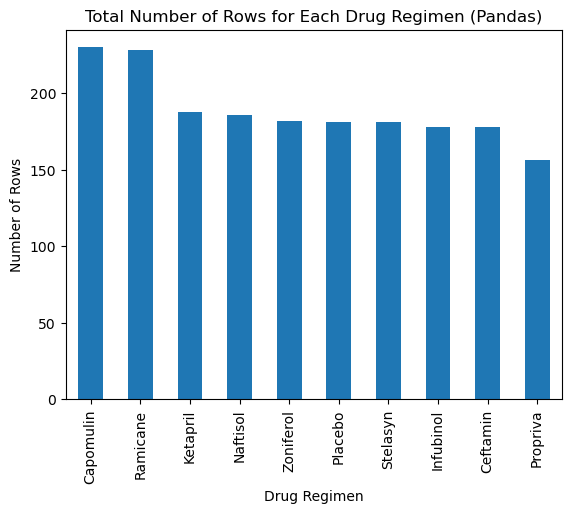

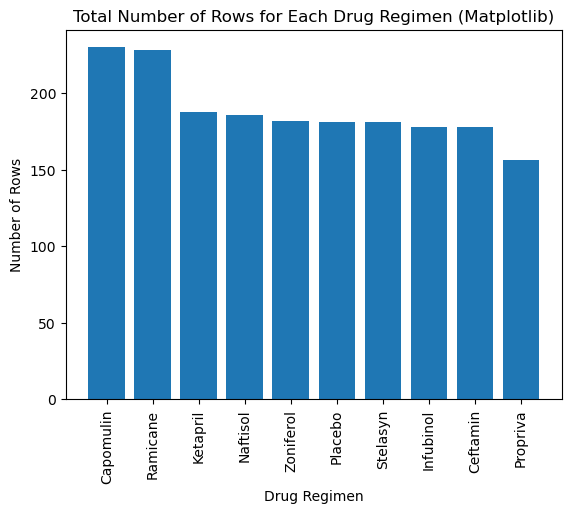

In [5]:

# 6. Create Bar Charts and Pie Charts
# Generate two bar charts showing the total number of rows (Mouse ID/Timepoints) for each drug regimen

# 7. Bar chart with Pandas DataFrame.plot() method
counts = cleaned_data["Drug Regimen"].value_counts()
counts.plot(kind="bar", title="Total Number of Rows for Each Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.show()

# 8. Bar chart with Matplotlib's pyplot methods
plt.bar(counts.index, counts.values)
plt.title("Total Number of Rows for Each Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=90)
plt.show()

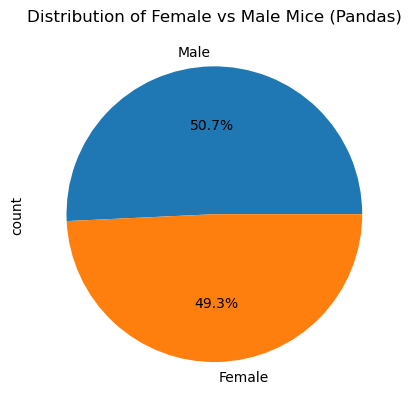

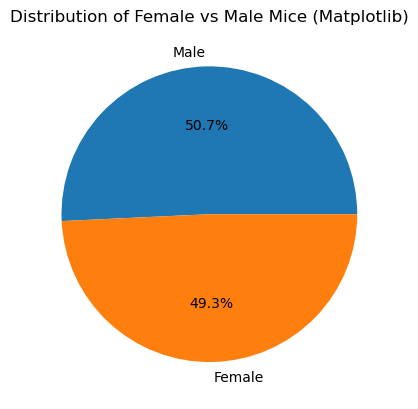

In [8]:

# 9. Generate two pie charts showing the distribution of female versus male mice in the study
gender_counts = cleaned_data["Sex"].value_counts()

# 10. Pie chart with Pandas DataFrame.plot() method
gender_counts.plot(kind="pie", autopct='%1.1f%%', title="Distribution of Female vs Male Mice (Pandas)")
plt.show()

# 11. Pie chart with Matplotlib's pyplot methods
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice (Matplotlib)")
plt.show()

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


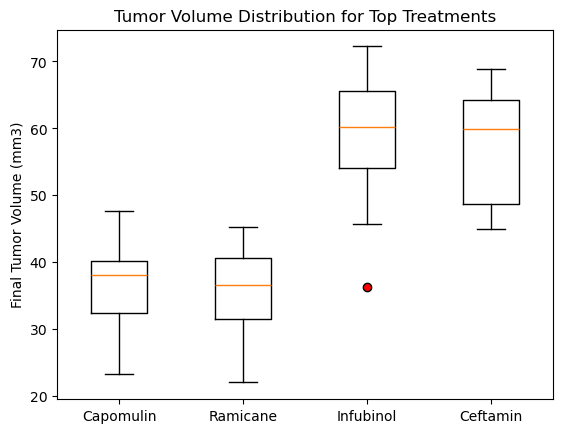

In [9]:

# 12. Calculate Quartiles, Find Outliers, and Create a Box Plot
# 13. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
# 14. Calculate the quartiles and IQR, and determine if there are any potential outliers
# i) Create a grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
max_timepoints = max_timepoints.reset_index()

# ii) Merge this grouped DataFrame with the original cleaned DataFrame
merged_data = max_timepoints.merge(cleaned_data, on=["Mouse ID", "Timepoint"])

# 15. Create a list that holds the treatment names and a second, empty list to hold the tumor volume data
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

# 16. Loop through each drug in the treatment list, locate the rows in the merged DataFrame that correspond to each treatment, and append the resulting final tumor volumes for each drug to the empty list
for treatment in treatments:
    tumor_volume = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volumes.append(tumor_volume)

    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using the upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

# 18. Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
ax.set_title("Tumor Volume Distribution for Top Treatments")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

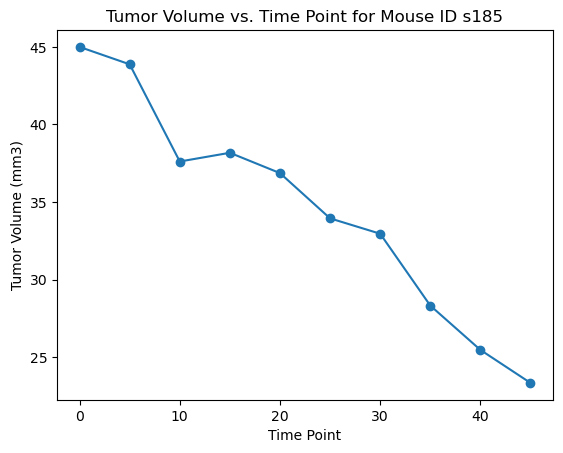

In [12]:

# 19. Create a Line Plot and a Scatter Plot
# Select a single mouse that was treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data["Mouse ID"].iloc[0]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Generate a line plot of tumor volume versus time point for that mouse
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


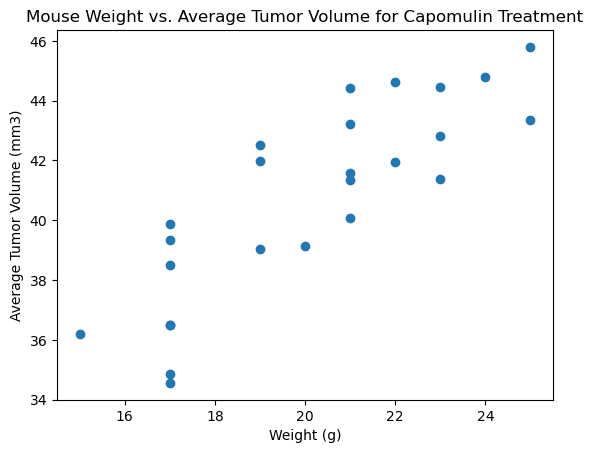

Correlation coefficient between mouse weight and average tumor volume: 0.841936342469472


In [16]:


def new_func():
    try:
    # Read the mouse data and the study results
        mouse_metadata = pd.read_csv(mouse_metadata_path)
        study_results = pd.read_csv(study_results_path)

    # Merge the data into a single DataFrame
        combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

    # Filter the data for the Capomulin regimen
        capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

    # Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
        capomulin_grouped = capomulin_data.groupby("Mouse ID").mean(numeric_only=True)
        avg_tumor_volume = capomulin_grouped["Tumor Volume (mm3)"]
        mouse_weight = capomulin_grouped["Weight (g)"]

        plt.scatter(mouse_weight, avg_tumor_volume)
        plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
        plt.xlabel("Weight (g)")
        plt.ylabel("Average Tumor Volume (mm3)")

    # Show the plot
        plt.show()

    # Print the correlation coefficient
        correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]
        print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

    except FileNotFoundError as e:
        print(f"File not found: {e.filename}")
    except pd.errors.EmptyDataError:
        print("No data found in the file(s).")
    except pd.errors.ParserError:
        print("Error parsing the data from the file(s).")
    except KeyError as e:
        print(f"Key error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

new_func()


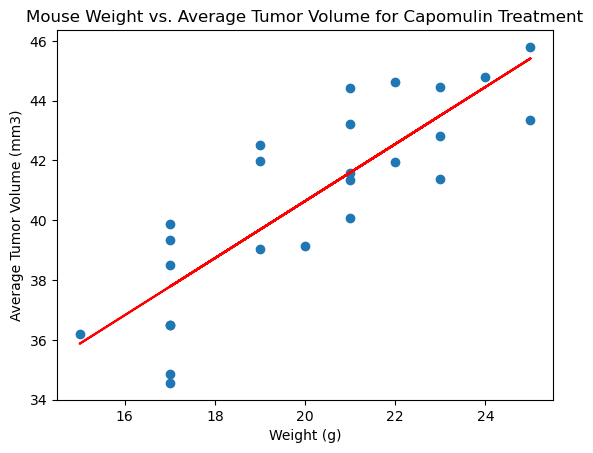

Correlation coefficient between mouse weight and average tumor volume: 0.841936342469472


In [28]:
# # Dependencies and Setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import scipy.stats as st

# # Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

try:
    # Read the mouse data and the study results
    mouse_metadata = pd.read_csv(mouse_metadata_path)
    study_results = pd.read_csv(study_results_path)

    # Merge the data into a single DataFrame
    combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

    # Filter the data for the Capomulin regimen
    capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

    # Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
    capomulin_grouped = capomulin_data.groupby("Mouse ID").mean(numeric_only=True)
    avg_tumor_volume = capomulin_grouped["Tumor Volume (mm3)"]
    mouse_weight = capomulin_grouped["Weight (g)"]

    plt.scatter(mouse_weight, avg_tumor_volume)
    plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
    plt.xlabel("Weight (g)")
    plt.ylabel("Average Tumor Volume (mm3)")

    # Calculate the linear regression model
    slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)
    regress_values = mouse_weight * slope + intercept

    # Plot the linear regression model on top of the scatter plot
    plt.plot(mouse_weight, regress_values, "r-")

    # Show the plot
    plt.show()

    # Print the correlation coefficient
    correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]
    print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

except FileNotFoundError as e:
    print(f"File not found: {e.filename}")
except pd.errors.EmptyDataError:
    print("No data found in the file(s).")
except pd.errors.ParserError:
    print("Error parsing the data from the file(s).")
except KeyError as e:
    print(f"Key error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
